# Projeto 3

### Importando bibliotecas

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from math import *

### Parâmetros

In [84]:
massa_bola=2 # kg
k_mola=5467 # N/m
g=9.8 # m/s^2
Cd=0.47 # Coeficiente de arrasto
p=1.2 # kg/m^3
A=pi*0.1**2 # m^2
c=11

### Condições iniciais

In [85]:
# Condições iniciais

y_0 = 1.025 # posicao inicial no eixo y
Vy_0 = -1 # velocidade inicial na direção do eixo y
condicoes_iniciais = [y_0, Vy_0] 

### Lista de tempo

In [86]:
tempo_inicial = 0
tempo_final =6
dt = 1e-2

tempo = np.arange(tempo_inicial, tempo_final, dt)

### Define a função modelo

In [87]:
def modelo(X,t):
    
    y = X[0] # Posição y
    vy = X[1] # Velocidade y

    D = 1/2 * p * Cd * A * (vy) * abs(vy)
    Fel = k_mola * (-y) # Força elástica
    P = massa_bola * g # Peso
    F_amort = c * (-vy) # Força amortecimento

    if y>0:
        Fel=0
        F_amort = 0
    
    elif y<0 and vy>0:
        F_amort = 0
        

    
    # Equações diferenciais
    dydt = vy
    dvydt = (-P + Fel - D + F_amort) / massa_bola

    return [dydt,dvydt]


## ODEINT + Plot

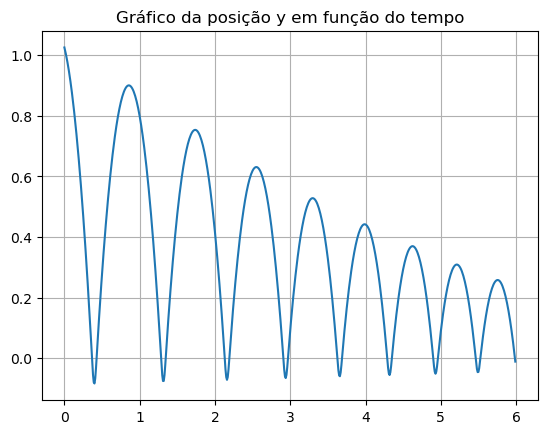

In [88]:
solucao_odeint = odeint(modelo, condicoes_iniciais, tempo)
lista_y = solucao_odeint[:,0]
lista_vy = solucao_odeint[:,1]


plt.plot(tempo, lista_y, label='y(t)')
plt.title('Gráfico da posição y em função do tempo')
plt.grid()
plt.show()

## Validação

### Acessando os dados do arquivo .txt

In [89]:
dados = "dados.txt"

# Passo 1: Abra o arquivo em modo de leitura
arquivo = open(dados, "r")

# Passo 2: Leia o conteúdo do arquivo
conteudo = arquivo.read()

# Passo 3: Feche o arquivo
arquivo.close()

# Passo 4: Divida o conteúdo em linhas
linhas = conteudo.splitlines()

# Passo 5: Armazene as linhas em uma lista
solucao = list(linhas)

# Lista
lista_altura = []
lista_tempo = []

# Subtrai -1.344 ao tempo devido ao momento de lançamento da bola no vídeo
for i in range(len(solucao)):
    lista_altura.append(float(solucao[i].split(',')[0]))
    lista_tempo.append(float(solucao[i].split(',')[1]) - 2.344 )


### Plotando os dados

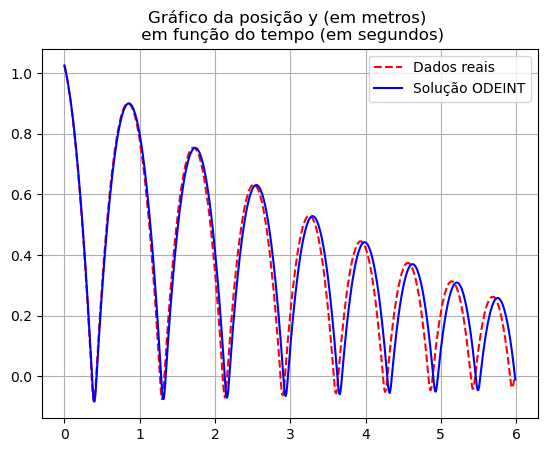

In [90]:
plt.plot(lista_tempo, lista_altura,'r--',label='Dados reais' )
plt.plot(tempo, lista_y, label='Solução ODEINT', color='blue')
plt.title('Gráfico da posição y (em metros) \n em função do tempo (em segundos)')
plt.legend()
plt.grid()
plt.show()

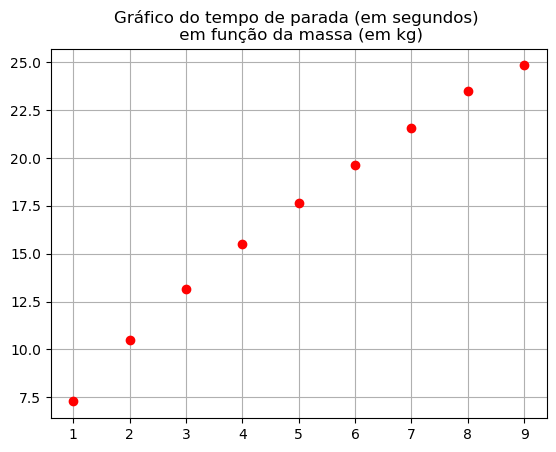

In [91]:
lista_massa = np.arange(1,10,1)
lista_tempo = np.arange(0,25,1e-2)

def modelo2(X,t, massa_bola):
    
    y = X[0] # Posição y
    vy = X[1] # Velocidade y

    D = 1/2 * p * Cd * A * (vy) * abs(vy)
    Fel = k_mola * (-y) # Força elástica
    P = massa_bola * g # Peso
    F_amort = c * (-vy) # Força amortecimento

    if y>0:
        Fel=0
        F_amort = 0
    
    elif y<0 and vy>0:
        F_amort = 0
        

    
    # Equações diferenciais
    dydt = vy
    dvydt = (-P + Fel - D + F_amort) / massa_bola

    return [dydt,dvydt]

tempo_p_massa = []

for massa in lista_massa:
    solucao_odeint2 = odeint(modelo2, condicoes_iniciais, lista_tempo, args=(massa,))
    lista_y2 = solucao_odeint2[:,0]

    for i in range(len(lista_y2)):
        if max(lista_y2[i:]) - min(lista_y2[i:]) < 0.02:
            tempo_p_massa.append(lista_tempo[i])
            break
    
plt.plot(lista_massa,tempo_p_massa, 'ro')
plt.title('Gráfico do tempo de parada (em segundos) \n em função da massa (em kg)')
plt.grid()
plt.show()

            




    


    

        
            
            